# Comparaison des 5 modèles: LogisticRegression, Randomforest, SVM, Gradient Boosting, KNN

# LogisticRegression

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df=pd.read_csv('predictive_maintenance.csv')

In [101]:
machines_data=pd.read_csv('predictive_maintenance.csv')

In [102]:
num_features = ["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]
cat_features = ["Type"]

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler


num_pipeline = Pipeline([("scaler", StandardScaler())])
            
cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder()),
    ('scaler', StandardScaler(with_mean=False))
    ])

In [104]:
preprocessor = ColumnTransformer(transformers=[
                ("num", num_pipeline, num_features),
                ("cat", cat_pipeline, cat_features)
                ])

In [105]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]']),
                                ('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['Type'])])

In [106]:
target_variable = ['Target']
not_imp_variables = ['UDI' , 'Product ID', 'Failure Type']

In [107]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2)

In [108]:
input_features_train_df = train_df.drop(columns= target_variable + not_imp_variables, axis=1)
target_train_df = train_df[target_variable]

In [109]:
input_features_train_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
8856,M,297.7,308.9,1327,63.7,21
1545,M,298.4,309.0,1544,38.8,97
8136,M,299.6,310.9,1474,39.7,64
7768,M,300.2,311.4,1960,20.9,20
7782,M,300.4,311.6,1518,36.4,53
...,...,...,...,...,...,...
1099,M,296.8,307.4,1472,43.9,30
2514,L,298.9,308.6,2069,18.7,27
6637,H,301.5,310.5,1453,48.0,124
2575,L,299.5,309.3,1422,49.2,179


In [110]:
target_train_df

,Target
8856,0
1545,0
8136,0
7768,0
7782,0
...,...
1099,0
2514,0
6637,0
2575,0


In [111]:
input_features_test_df = test_df.drop(columns= target_variable + not_imp_variables, axis=1)
target_test_df = test_df[target_variable]

In [112]:
input_features_train_df_array = preprocessor.fit_transform(input_features_train_df)
input_features_test_df_array = preprocessor.transform(input_features_test_df)

In [113]:
input_features_test_df_array.shape

(2000, 8)

In [114]:
input_features_train_df_array.shape

(8000, 8)

In [115]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]

In [116]:
train_array

array([[-1.14538543, -0.73821098, -1.17721702, ...,  0.        ,
         2.18062479,  0.        ],
       [-0.79625858, -0.67113823,  0.03720569, ...,  0.        ,
         2.18062479,  0.        ],
       [-0.19775542,  0.60324385, -0.35454358, ...,  0.        ,
         2.18062479,  0.        ],
       ...,
       [ 0.74987459,  0.33495289, -0.47206835, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24763068, -0.46992001, -0.64555731, ...,  2.03997642,
         0.        ,  0.        ],
       [-0.04812963,  0.33495289,  0.06518778, ...,  0.        ,
         0.        ,  0.        ]])

In [117]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [118]:
X_train.shape

(8000, 8)

In [119]:
y_train.shape

(8000,)

In [120]:
X_test.shape

(2000, 8)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
lr=LogisticRegression()
lr.fit(X_train, y_train)
predictions=lr.predict(X_test)
accscore=accuracy_score(y_test,predictions)
print(accscore)

0.969


In [139]:
log_reg = LogisticRegression(
    penalty='l2',           # Keep l2 regularization
    C=0.4,                  # Stronger regularization
    solver='saga',          # Use saga solver for large datasets
    max_iter=300            # Train for up to 300 iterations
)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.4, max_iter=300, solver='saga')

In [140]:
predictionss=log_reg.predict(X_test)

In [141]:
score=accuracy_score(y_test, predictionss)

In [142]:
print(score)

0.97


In [147]:
# Print metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, predictionss))           # Overall accuracy
print("Classification Report:\n", classification_report(y_test, predictionss))  # Precision, Recall, F1
print("Confusion Matrix:\n", confusion_matrix(y_test, predictionss))  # True Positives/Negatives

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1927
         1.0       0.93      0.19      0.32        73

    accuracy                           0.97      2000
   macro avg       0.95      0.60      0.65      2000
weighted avg       0.97      0.97      0.96      2000

Confusion Matrix:
 [[1926    1]
 [  59   14]]


In [191]:
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
)
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [195]:
# function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [196]:
# evaluate metrics on training data
logistic_regression_performance_train = model_performance_classification(
    lr, X_train, y_train
)
logistic_regression_performance_train

,Accuracy,Recall,Precision,F1
0,0.9705,0.176692,0.734375,0.284848


In [197]:
# evaluate metrics on test data
logistic_regression_performance_test = model_performance_classification(
    lr, X_test, y_test
)
logistic_regression_performance_test

,Accuracy,Recall,Precision,F1
0,0.969,0.191781,0.823529,0.311111


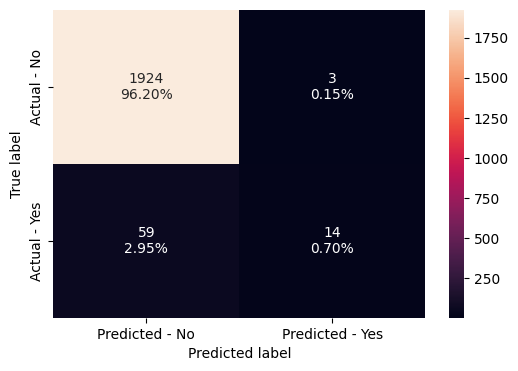

In [198]:
# evaluate confusion matrix on training data
make_confusion_matrix(lr,y_test)

# Gradient Boosting

In [236]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]

In [237]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [238]:
# Import Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_clf = GradientBoostingClassifier(
    n_estimators=100,   # Number of trees (default: 100)
    learning_rate=0.1,  # Step size shrinkage to control overfitting (default: 0.1)
    max_depth=3,        # Maximum depth of each tree (default: 3)
    random_state=42     # For reproducibility
)

In [239]:
gb_clf

GradientBoostingClassifier(random_state=42)

In [240]:
# Train the model
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [241]:
# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9815
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1927
         1.0       0.86      0.59      0.70        73

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[1920    7]
 [  30   43]]


In [242]:
# evaluate metrics on training data
gradient_boosting_performance_train = model_performance_classification(
    gb_clf, X_train, y_train
)
gradient_boosting_performance_train

,Accuracy,Recall,Precision,F1
0,0.9915,0.759398,0.980583,0.855932


In [243]:
# evaluate metrics on test data
gradient_boosting_performance_test = model_performance_classification(
    gb_clf, X_test, y_test
)
gradient_boosting_performance_test

,Accuracy,Recall,Precision,F1
0,0.9815,0.589041,0.86,0.699187


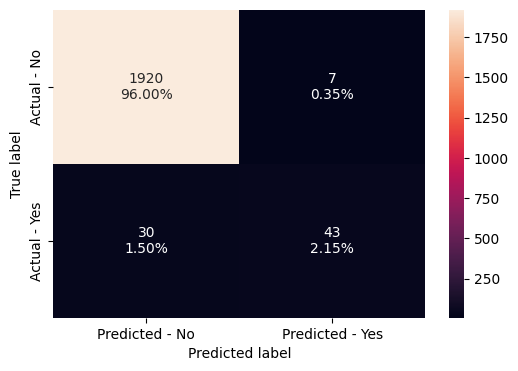

In [244]:
# evaluate confusion matrix on training data
make_confusion_matrix(gb_clf,y_test)

# Random Forest

In [210]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]

In [211]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [212]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=200,   # Number of trees (default: 100)
    max_depth=None,     # Maximum depth of the tree (default: None, fully grown trees)
    random_state=2,    # Ensures reproducibility
    n_jobs=-2           # Use all available CPU cores for faster computation
)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.982
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1927
         1.0       0.91      0.56      0.69        73

    accuracy                           0.98      2000
   macro avg       0.95      0.78      0.84      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[1923    4]
 [  32   41]]


In [213]:
# evaluate metrics on training data
random_forest_performance_train = model_performance_classification(
    rf_clf, X_train, y_train
)
random_forest_performance_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [214]:
# evaluate metrics on test data
random_forest_performance_test = model_performance_classification(
    rf_clf, X_test, y_test
)
random_forest_performance_test

,Accuracy,Recall,Precision,F1
0,0.982,0.561644,0.911111,0.694915


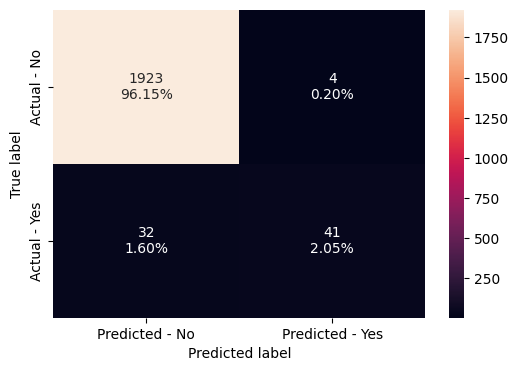

In [221]:
# evaluate confusion matrix on training data
make_confusion_matrix(rf_clf,y_test)

# SVM: Support Vector machine

In [164]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]

In [165]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [166]:
# Import Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model with specific kernel and regularization parameter
svm_clf = SVC(
    C=1.0,             # Regularization parameter, higher values avoid misclassification
    kernel='rbf',      # Radial basis function (RBF) kernel, commonly used for non-linear data
    random_state=42    # Ensures reproducibility
)

# Train the SVM model on the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9685
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1927
         1.0       0.86      0.16      0.28        73

    accuracy                           0.97      2000
   macro avg       0.91      0.58      0.63      2000
weighted avg       0.97      0.97      0.96      2000

Confusion Matrix:
 [[1925    2]
 [  61   12]]


### tuning the SVM model

In [171]:
svm_clf2 = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

In [172]:
# Train the SVM model on the training data
svm_clf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9685


In [216]:
svm_clf1 = SVC(C=10, kernel='rbf', random_state=42)

In [217]:
# Train the SVM model on the training data
svm_clf1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf1.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9765


In [219]:
# evaluate metrics on training data
svm_performance_train = model_performance_classification(
    svm_clf1, X_train, y_train
)
svm_performance_train

,Accuracy,Recall,Precision,F1
0,0.983625,0.537594,0.94702,0.685851


In [220]:
# evaluate metrics on test data
svm_performance_test = model_performance_classification(
    svm_clf1, X_test, y_test
)
svm_performance_test

,Accuracy,Recall,Precision,F1
0,0.9765,0.452055,0.825,0.584071


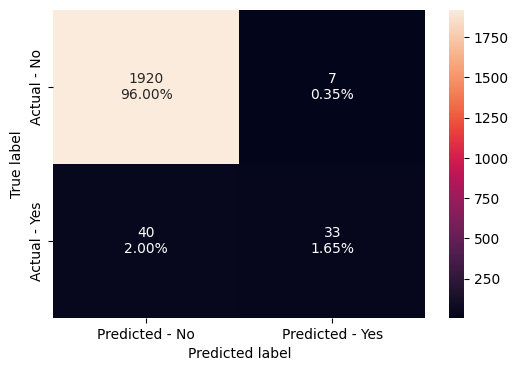

In [222]:
# evaluate confusion matrix on training data
make_confusion_matrix(svm_clf1,y_test)

# KNN : K Nearest Neighbors

In [223]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]

In [224]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [225]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN model with specified number of neighbors and distance metric
knn_clf = KNeighborsClassifier(
    n_neighbors=5,       # Number of neighbors to consider for classification
    weights='uniform',   # Weight function (uniform or distance-based)
    metric='minkowski',  # Distance metric (Euclidean distance by default)
)

# Train the KNN model on the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9695
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1927
         1.0       0.73      0.26      0.38        73

    accuracy                           0.97      2000
   macro avg       0.85      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000

Confusion Matrix:
 [[1920    7]
 [  54   19]]


In [226]:
# evaluate metrics on training data
knn_performance_train = model_performance_classification(
    knn_clf, X_train, y_train
)
knn_performance_train

,Accuracy,Recall,Precision,F1
0,0.981,0.458647,0.938462,0.616162


In [227]:
# evaluate metrics on test data
knn_performance_test = model_performance_classification(
    knn_clf, X_test, y_test
)
knn_performance_test

,Accuracy,Recall,Precision,F1
0,0.9695,0.260274,0.730769,0.383838


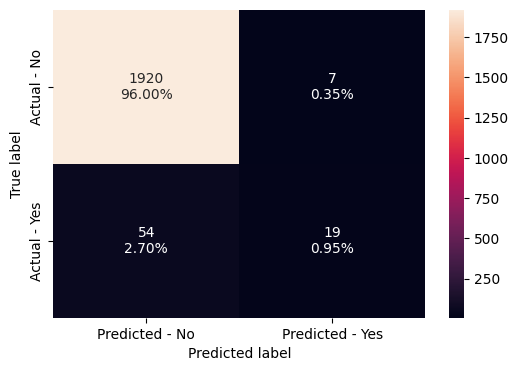

In [228]:
# evaluate confusion matrix on training data
make_confusion_matrix(knn_clf,y_test)

# Comparaison de tous les modèles

In [245]:
model_names = ['knn_performance_test', 'svm_performance_test', 'random_forest_performance_test', 'gradient_boosting_performance_test', 'logistic_regression_performance_test']
dataframes = [knn_performance_test, svm_performance_test, random_forest_performance_test, gradient_boosting_performance_test, logistic_regression_performance_test]

for df, name in zip(dataframes, model_names):
    df['Model'] = name
    
# Concatenate DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df

,Accuracy,Recall,Precision,F1,Model
0,0.9695,0.260274,0.730769,0.383838,knn_performance_test
1,0.9765,0.452055,0.825000,0.584071,svm_performance_test
2,0.9820,0.561644,0.911111,0.694915,random_forest_performance_test
3,0.9815,0.589041,0.860000,0.699187,gradient_boosting_performance_test
4,0.9690,0.191781,0.823529,0.311111,logistic_regression_performance_test


# ÉVALUATION :

**Une erreur de faux positif du modèle indique qu'une machine va échouer, alors qu'en réalité elle ne va pas échouer. À l'inverse, une erreur de faux négatif indique qu'une machine ne va pas échouer, alors qu'en réalité elle échouera.**

Ces deux types d'erreurs sont coûteux pour l'entreprise. Par conséquent, nous avons sélectionné le score F1 comme métrique d'évaluation afin de choisir le modèle qui minimise à la fois les erreurs de faux positifs et de faux négatifs.

D'après les matrices de confusion, les faux négatifs et faux positifs variaient entre 0,9% et 9,35%.

En comparant les scores F1 pour l'ensemble de validation, les 2 meilleurs modèles développés jusqu'à présent sont :

**Le modèle Random Forest(69,5%)**

**Le modèle Gradient Boosting (70%)**

Nous allons **affiner les hyperparamètres de ces deux modèles** afin d'améliorer les **métriques de prédiction**.

REMARQUE : Nous observons que les modèles sur-apprennent sur les données d'entraînement.

# Random Forest avec ajustement des hyperparamètres (Randomized Search = recherche aléatoire)

In [246]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]


X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [253]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 300),            # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50],     # Depth of each tree
    'min_samples_split': randint(2, 20),         # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 10)         # Minimum samples required at a leaf node
}

# Set up RandomizedSearchCV
random_search_Random_Forest = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_distributions,
    n_iter=50,               # Number of parameter settings sampled
    scoring='f1',            # Evaluation metric (use 'accuracy' or 'f1' for classification)
    cv=5,                    # Cross-validation folds
    verbose=2,               # Show progress
    random_state=42,
    n_jobs=-1                # Use all available processors
)

# Perform RandomizedSearchCV
random_search_Random_Forest.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best Parameters:", random_search_Random_Forest.best_params_)
print("Best Score (F1):", random_search_Random_Forest.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 58}
Best Score (F1): 0.6505302664766126


In [254]:
# Generate predictions on labels:
predictions_train = random_search_Random_Forest.predict(X_train)
predictions_test = random_search_Random_Forest

In [255]:
# evaluate metrics on training data
random_search_Random_Forest_trng = model_performance_classification(
    random_search_Random_Forest, X_train, y_train
)
random_search_Random_Forest_trng

,Accuracy,Recall,Precision,F1
0,0.993375,0.808271,0.990783,0.890269


In [257]:
# evaluate metrics on testing data
random_search_Random_Forest_test = model_performance_classification(
    random_search_Random_Forest, X_test, y_test
)
random_search_Random_Forest_test

,Accuracy,Recall,Precision,F1
0,0.9795,0.534247,0.847826,0.655462


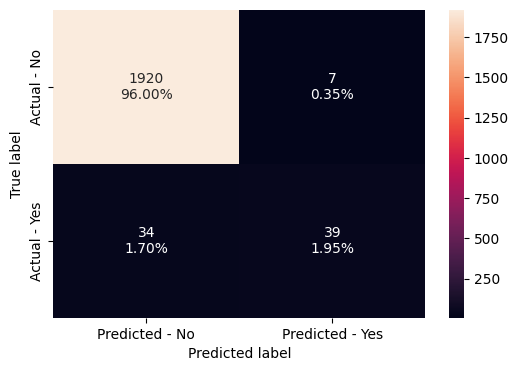

In [259]:
# evaluate confusion matrix on training data
make_confusion_matrix(random_search_Random_Forest,y_test)

# Gradient Boosting avec ajustement des hyperparamètres (Randomized Search = recherche aléatoire)

In [260]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]


X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [262]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Initialize the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 300),            # Number of boosting stages (trees)
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size for each boosting step
    'max_depth': randint(3, 10),                  # Maximum depth of each tree
    'min_samples_split': randint(2, 20),          # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 10),           # Minimum samples required at a leaf node
    'subsample': [0.7, 0.8, 0.9, 1.0]        # Fraction of samples used for fitting trees
}

# Set up RandomizedSearchCV
random_search_gradient_boosting = RandomizedSearchCV(
    estimator=gb_clf,
    param_distributions=param_distributions,
    n_iter=50,               # Number of parameter settings sampled
    scoring='f1',            # Evaluation metric (use 'accuracy' or 'f1' for classification)
    cv=5,                    # Cross-validation folds
    verbose=2,               # Show progress
    random_state=42,
    n_jobs=-1                # Use all available processors
)

# Perform RandomizedSearchCV
random_search_gradient_boosting.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best Parameters:", random_search_gradient_boosting.best_params_)
print("Best Score (F1):", random_search_gradient_boosting.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 173, 'subsample': 0.9}
Best Score (F1): 0.793419350313616


In [263]:
# evaluate metrics on training data
random_search_gradient_boosting_train = model_performance_classification(
    random_search_gradient_boosting, X_train, y_train
)
random_search_gradient_boosting_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [264]:
# evaluate metrics on test data
random_search_gradient_boosting_test = model_performance_classification(
    random_search_gradient_boosting, X_test, y_test
)
random_search_gradient_boosting_test

,Accuracy,Recall,Precision,F1
0,0.9865,0.739726,0.870968,0.8


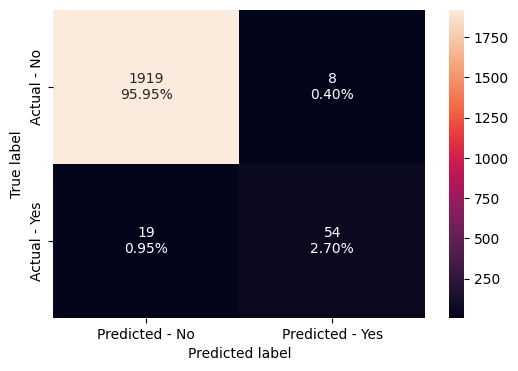

In [266]:
# evaluate confusion matrix on training data
make_confusion_matrix(random_search_gradient_boosting,y_test)

# Evaluation des modèles ajustés optimisant F1 score

In [267]:
final_model_names = ['random_search_Random_Forest_test', 'random_search_gradient_boosting_test']
dataframes_2 = [random_search_Random_Forest_test, random_search_gradient_boosting_test]

for df2, name in zip(dataframes_2, final_model_names):
    df2['Model'] = name
    
# Concatenate DataFrames
combined_df_final2 = pd.concat(dataframes_2, ignore_index=True)

combined_df_final2

,Accuracy,Recall,Precision,F1,Model
0,0.9795,0.534247,0.847826,0.655462,random_search_Random_Forest_test
1,0.9865,0.739726,0.870968,0.800000,random_search_gradient_boosting_test


'** : 0.8  

# EVALUATION

Le meilleur score F1 pour les modèles ajustés est de **80%** avec le modèle **Gradient Boosting** utilisant la recherche aléatoire **Random Search**. Les **meilleurs paramètres** obtenus lors de la recherche aléatoire qui ont optimisé le score F1 sont les suivants :

- **'learning_rate'** : 0.1

- **'max_depth'** : 9
  
- **'min_samples_leaf'** : 1
 
- **'min_samples_split'** : 10
 
- **'n_estimators'** : 173
 
- **'subsample'** : 0.9

# Meilleur Modèle :  Gradient Boosting avec les hyperparamètres mentionnées ci-dessus

In [270]:
train_array = np.c_[input_features_train_df_array, np.array(target_train_df)]
test_array = np.c_[input_features_test_df_array, np.array(target_test_df)]


X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [276]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Initialisation du modèle avec les meilleurs paramètres
gradient_boosting_best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=9,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=173,
    subsample=0.9,
    random_state=42
)

# Entraîner le modèle avec les données d'entraînement
gradient_boosting_best_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = gradient_boosting_best_model.predict(X_test)

# Évaluer le modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score sur l'ensemble de test : {f1}")

# Afficher le rapport de classification
print("Classification Report:\n", classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


F1 Score sur l'ensemble de test : 0.8
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1927
         1.0       0.87      0.74      0.80        73

    accuracy                           0.99      2000
   macro avg       0.93      0.87      0.90      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1919    8]
 [  19   54]]


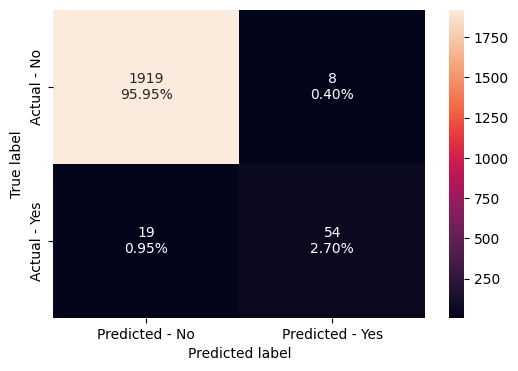

In [277]:
make_confusion_matrix(gradient_boosting_best_model,y_test)

In [278]:
import joblib
joblib.dump(gradient_boosting_best_model, 'gradient_boosting_best_model.pkl')

['gradient_boosting_best_model.pkl']